In [2]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
def easy_scatter(x,y,title = '', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

In [3]:
pwd

u'/Users/ascott47/blausteinmount/finalthesischapter'

In [4]:
# read in air temperature data
filepath = '../cityheat/Bmore/2016/'

meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype(int), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv(filepath + 'data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H').first()
tempDF.columns = tempDF.columns.astype(int)

rhDF = pd.read_csv(filepath + 'data/CleanedRH2016.csv', parse_dates = [0]).set_index('Date').resample('H').first()
rhDF.columns = rhDF.columns.astype(int)

I want to analyse how urban and rural temperatures change differently under extreme heat. First, note that as it gets warmer, urban-rural temperature differences are exaggerated: 

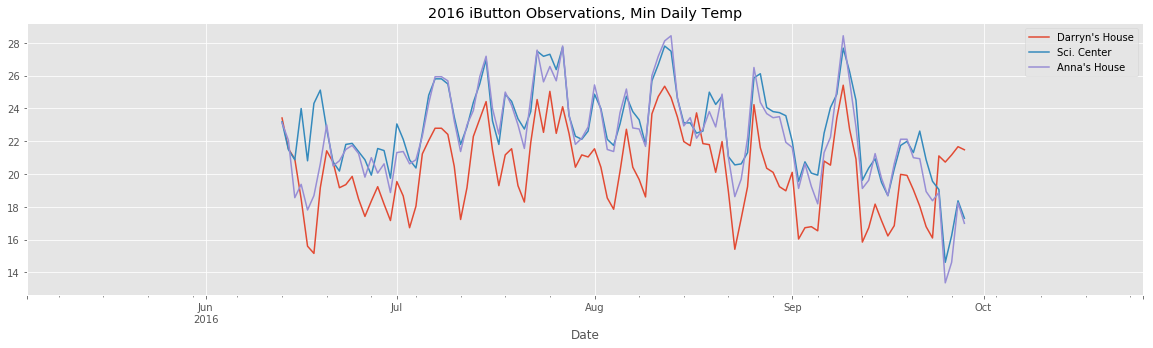

In [5]:
#68 = rural 
#108 = urban
#97 = SC
plt.style.use('ggplot')
tempDF[[68, 97,108]].resample('D').min().plot(figsize= [20,5])
plt.legend(['Darryn\'s House', 'Sci. Center','Anna\'s House'])
urban = 97
rural = 68
plt.title('2016 iButton Observations, Min Daily Temp')

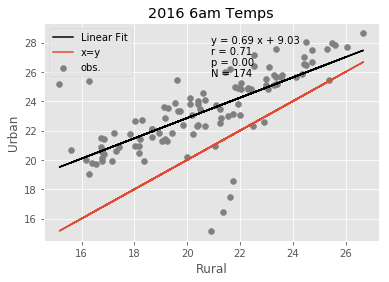

In [26]:
hour = 6
easy_scatter(tempDF[rural][tempDF.index.hour ==hour ] , tempDF[urban][tempDF.index.hour ==hour ],
             '2016 6am Temps', 'Rural', 'Urban')
plt.plot(tempDF[rural][tempDF.index.hour ==hour ], tempDF[rural][tempDF.index.hour ==hour ])
plt.legend(['Linear Fit', 'x=y', 'obs.'])

We can connect this phenomena with synoptic or large-scale changes. We see on average that $ DT = T_u - T_r $ is larger during moist events than during dry events. 

/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


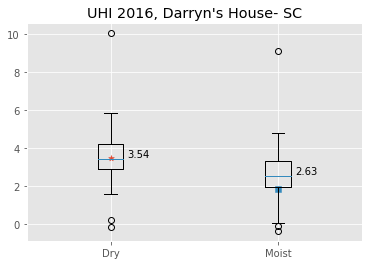

In [29]:
# read in synoptic Data
file = '/Users/ascott47/blausteinmount/heat/data/synopticclassification/' + 'BWI'+ '.dbdmt'
synopticDF =  pd.read_table(file, sep = ' ', header =  None, parse_dates = [1])
synopticDF.columns = ['id','date', 'ssc']
synopticDF = synopticDF.set_index(synopticDF['date'])
synopticDF['ssc'].loc[synopticDF['ssc']> 60] =6.5
syn = synopticDF['ssc']['2016-06-01': '2016-09-15'].resample('D').mean()#[pd.PeriodIndex(UHI.index, freq = 'D')[0]:pd.PeriodIndex(UHI.index, freq = 'D')[-1]]

UHI = (tempDF[urban][tempDF.index.hour ==6 ] - tempDF[rural][tempDF.index.hour ==6 ]).resample('D').mean()
dry_UHI = UHI[syn[syn <=3].index].dropna()
moist_UHI = UHI[syn[syn > 3].index].dropna()
data = [dry_UHI.values, 
        moist_UHI.values]
fig,ax = plt.subplots()
plot_handle = plt.boxplot(data)
ax.set_xticklabels(['Dry', 'Moist'])
plt.text(1.1, dry_UHI.mean(), '%2.2f'%dry_UHI.mean())
plt.text(2.1, moist_UHI.mean(), '%2.2f'%moist_UHI.mean())
ax.set_title('UHI 2016, Darryn\'s House- SC')

plt.scatter(1, UHI['2016-07-02'], marker='*')
plt.scatter(2, UHI['2016-07-18'], marker='s')

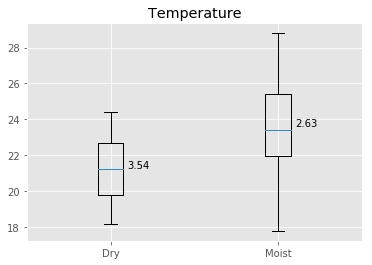

In [154]:
# hot versus cold rural temps
dry_temp = tempDF[rural][syn[syn <=3].index].dropna()
moist_temp = tempDF[rural][syn[syn > 3].index].dropna()
data = [dry_temp.values, 
        moist_temp.values]
fig,ax = plt.subplots()
plot_handle = plt.boxplot(data)
ax.set_xticklabels(['Dry', 'Moist'])
plt.text(1.1, dry_temp.mean(), '%2.2f'%dry_UHI.mean())
plt.text(2.1, moist_temp.mean(), '%2.2f'%moist_UHI.mean())
ax.set_title('Temperature')

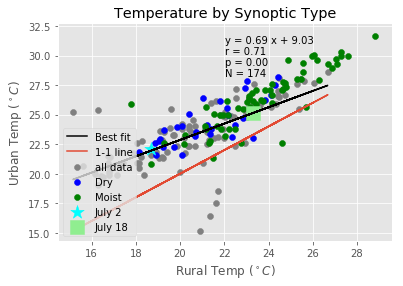

In [156]:
UHI = (tempDF[urban][tempDF.index.hour ==6 ] - tempDF[rural][tempDF.index.hour ==6 ])
easy_scatter(tempDF[rural][tempDF.index.hour ==6 ],
             tempDF[urban][tempDF.index.hour ==6 ], 'Temperature by Synoptic Type')
plt.plot(tempDF[rural][tempDF.index.hour ==6 ],tempDF[rural][tempDF.index.hour ==6 ],)
plt.scatter(tempDF.loc[dry_UHI.index][rural], 
           tempDF.loc[dry_UHI.index][urban], color = 'blue')
plt.scatter(tempDF.loc[moist_UHI.index][rural], 
           tempDF.loc[moist_UHI.index][urban], color = 'green')

plt.scatter(tempDF[rural]['2016-07-02 06:00:00'], tempDF[urban]['2016-07-02 06:00:00'], s=200, marker = '*', color = 'cyan')
plt.scatter(tempDF[rural]['2016-07-18 06:00:00'], tempDF[urban]['2016-07-18 06:00:00'], s=200, marker = 's', color = 'lightgreen')
#plt.scatter(tempDF[rural]['2016-08-03 06:00:00'], UHI['2016-08-03'], s=200, marker = 's', color = 'pink')
plt.xlabel('Rural Temp ($^\circ C$)')
plt.ylabel('Urban Temp ($^\circ C$)')

plt.legend(['Best fit', '1-1 line',  'all data', 'Dry', 'Moist', 'July 2', 'July 18', 'Aug 3'], loc = 3)

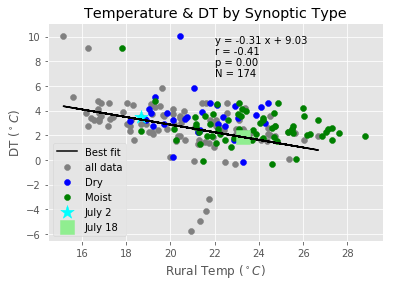

In [39]:
UHI = (tempDF[urban][tempDF.index.hour ==6 ] - tempDF[rural][tempDF.index.hour ==6 ])
easy_scatter(tempDF[rural][tempDF.index.hour ==6 ],
             UHI, 'Temperature & DT by Synoptic Type')
plt.scatter(tempDF.loc[dry_UHI.index][rural], 
           UHI.resample('D').mean().loc[dry_UHI.index], color = 'blue')
plt.scatter(tempDF.loc[moist_UHI.index][rural], 
           UHI.resample('D').mean().loc[moist_UHI.index], color = 'green')

plt.scatter(tempDF[rural]['2016-07-02 06:00:00'], UHI['2016-07-02'], s=200, marker = '*', color = 'cyan')
plt.scatter(tempDF[rural]['2016-07-18 06:00:00'], UHI['2016-07-18'], s=200, marker = 's', color = 'lightgreen')
#plt.scatter(tempDF[rural]['2016-08-03 06:00:00'], UHI['2016-08-03'], s=200, marker = 's', color = 'pink')
plt.xlabel('Rural Temp ($^\circ C$)')
plt.ylabel('DT ($^\circ C$)')
plt.legend(['Best fit', 'all data', 'Dry', 'Moist', 'July 2', 'July 18', 'Aug 3'], loc = 3)

We need to pick 2 days to do further analysis- one moist, one dry. 

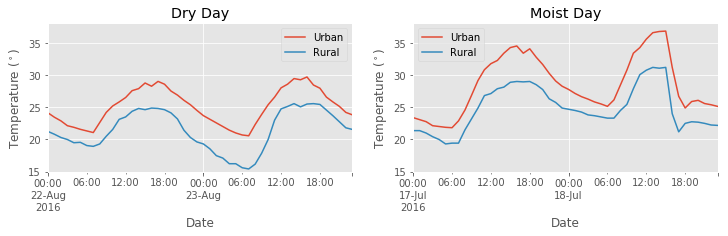

In [102]:
plt.figure(figsize=[12,6])
# plot temperature 
ax = plt.subplot(221)
tempDF[[urban, rural]]['2016-08-22':'2016-08-23'].plot(ax = ax)
plt.legend(['Urban', 'Rural'])
plt.title('Dry Day')
plt.ylim([15,38])
plt.ylabel('Temperature ($^\circ$)')

ax2 = plt.subplot(222)
tempDF[[urban, rural]]['2016-07-17':'2016-07-18'].plot(ax = ax2)
plt.legend(['Urban', 'Rural'])
plt.title('Moist Day')
plt.ylim([15,38])
plt.ylabel('Temperature ($^\circ$)')

# # plot temp tendency
# ax3 = plt.subplot(223)
# dT = pd.DataFrame(tempDF[[urban, rural]]['2016-08-23':'2016-08-23'].iloc[1:,:].values - tempDF[[urban, rural]]['2016-08-23':'2016-08-23'].iloc[0:-1,:].values, 
#             columns = ['urban', 'rural'], index = np.arange(1,48))
# dT.plot(ax = ax3)
# plt.axhline(0, color = 'grey')
# plt.xlabel('Hour')
# plt.ylabel('Temperature Tendency ($^\circ$ C/hr)')
# plt.title('Dry Day')

# ax4 = plt.subplot(224)
# dT = pd.DataFrame(tempDF[[urban, rural]]['2016-07-17':'2016-07-18'].iloc[1:,:].values - tempDF[[urban, rural]]['2016-07-17':'2016-07-18'].iloc[0:-1,:].values, 
#             columns = ['urban', 'rural'], index = np.arange(1,48))
# dT.plot(ax = ax4)
# plt.axhline(0, color = 'grey')

# plt.xlabel('Hour')
# plt.ylabel('Temperature Tendency ($^\circ$ C/hr)')
# plt.title('Moist Day')

On the dry day, Aug 23, we see that rural temps cool off at night, but not urban temps. On the moist day, we see that rural areas can't cool off at night. Need to check if this is robust. 

In [118]:
tempDF['2016-07-24 00:00:00':'2016-07-02 23:59:00'].values

array([], shape=(0, 91), dtype=float64)

(18, 38)

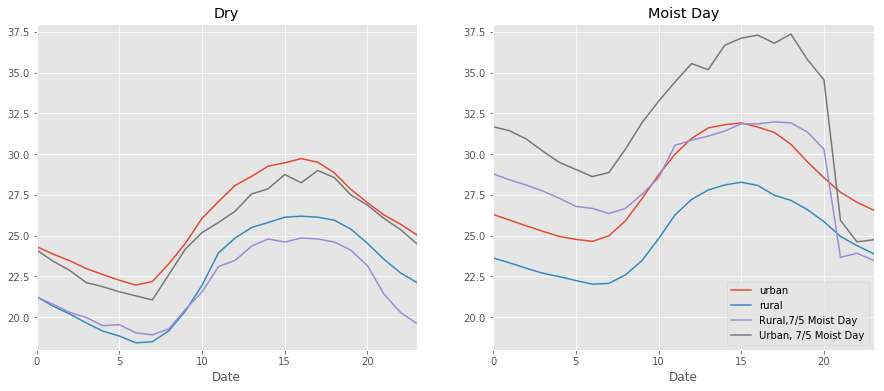

In [142]:
# frames = []
# for date in syn[syn<=3].index: 
#     frames.append(tempDF[tempDF.index.date==date.to_datetime().date()])

# dry_tempDF = pd.concat(frames)

# frames = []
# for date in syn[syn>3].index: 
#     frames.append(tempDF[tempDF.index.date==date.to_datetime().date()])
# plot dry temps 
plt.figure(figsize=[15,6])
ax = plt.subplot(121)
dry_tempDF.groupby(dry_tempDF.index.hour).mean()[urban].plot(label= 'urban, dry day', ax = ax)
dry_tempDF.groupby(dry_tempDF.index.hour).mean()[rural].plot(label= 'rural, dry day', ax = ax)
ax.plot(tempDF[rural]['2016-08-22 00:00:00':'2016-08-23 23:59:00'].values, label = 'Rural,8/22 (dry)')
ax.plot(tempDF[urban]['2016-08-22 00:00:00':'2016-08-23 23:59:00'].values, label = 'Urban, 8/22 (dry)')
ax.set_title('Dry')
ax.set_ylim([18,38])
# plot moist temps
ax2 = plt.subplot(122)
moist_tempDF = pd.concat(frames)
moist_tempDF.groupby(moist_tempDF.index.hour).mean()[urban].plot(label= 'urban')#, moist day')
moist_tempDF.groupby(moist_tempDF.index.hour).mean()[rural].plot(label= 'rural')
plt.plot(tempDF[rural]['2016-08-14 00:00:00':'2016-08-15 23:59:00'].values, label = 'Rural,7/5 Moist Day')
plt.plot(tempDF[urban]['2016-08-14 00:00:00':'2016-08-15 23:59:00'].values, label = 'Urban, 7/5 Moist Day')
ax2.set_title('Moist Day')
plt.legend(loc= 4)
ax2.set_ylim([18,38])


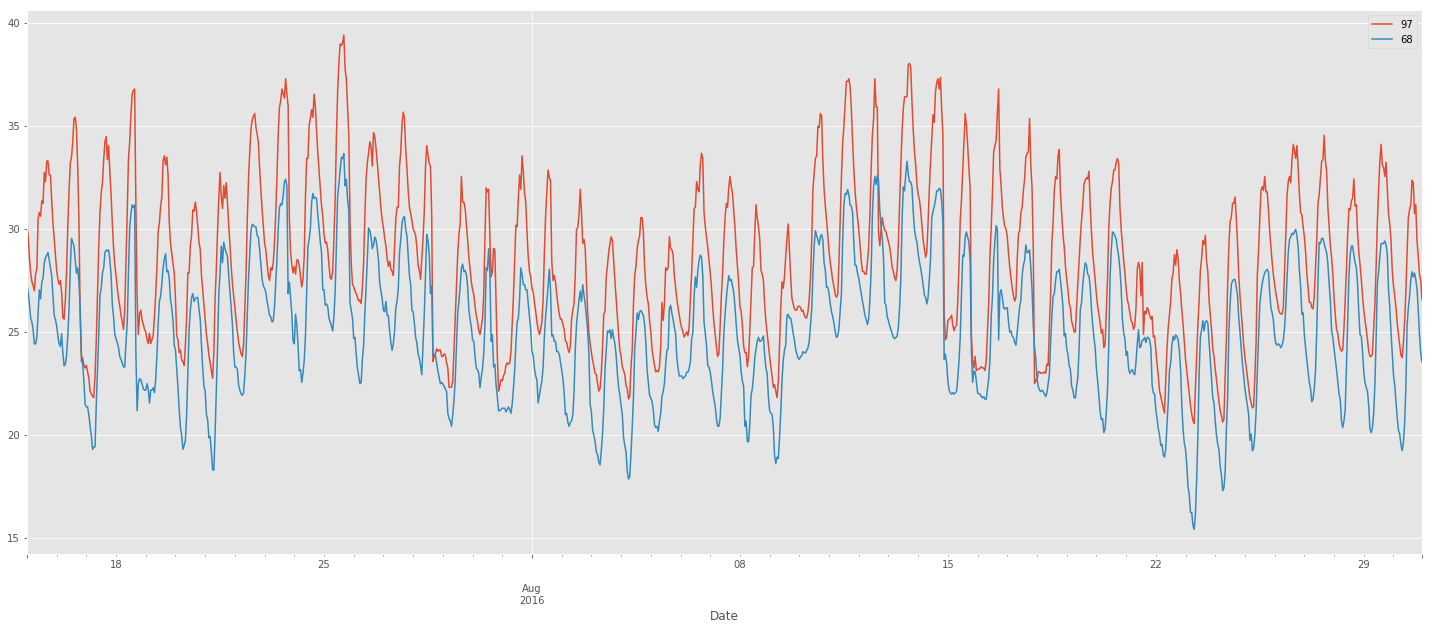

In [150]:
tempDF[[urban,rural]]['2016-07-15':'2016-08-30'].plot(figsize=[25,10])

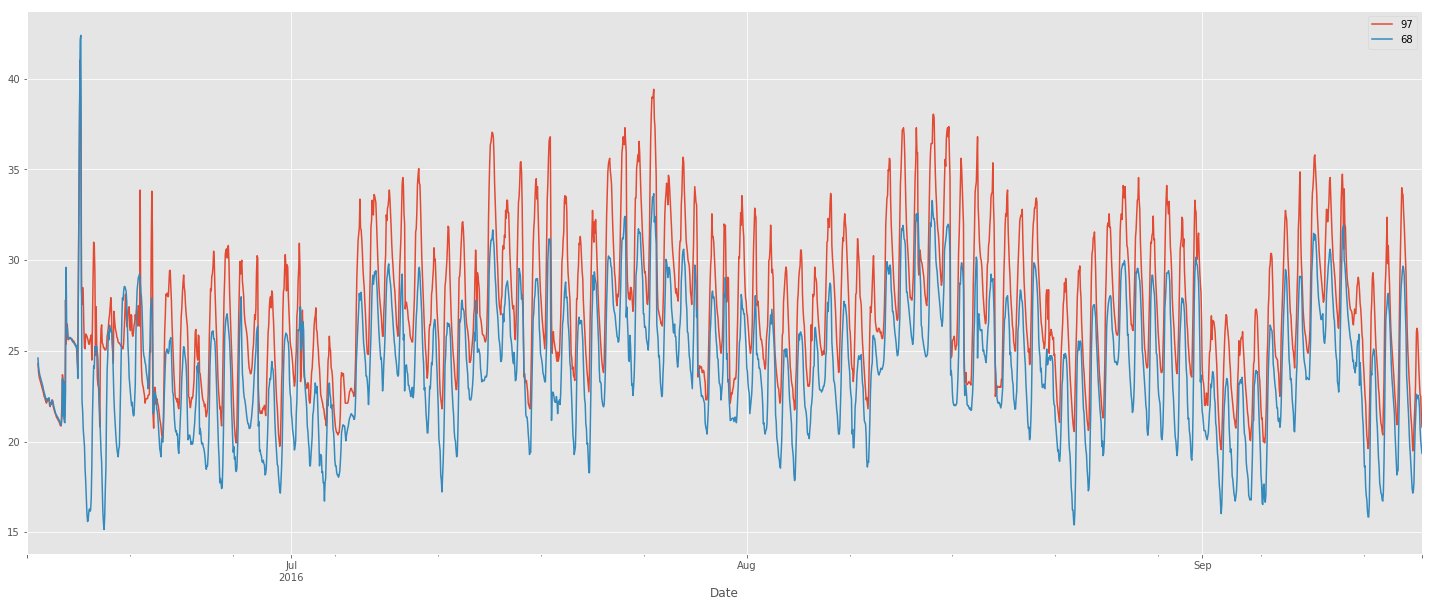

In [59]:
tempDF[[urban,rural]]['2016-06-13':'2016-09-15'].plot(figsize=[25,10])

In [9]:
# read in LST data
import scipy.stats
import ee 
sigma = 5.671e-8 #W.m-2.K-4

ee.Initialize()

def compute_LST(lat,lon, startTime, endTime): 
    L8_DN = ee.ImageCollection('LANDSAT/LC8_L1T').filterDate(startTime, endTime)
    emissivity = ee.Image('NASA/ASTER_GED/AG100_003').select('emissivity_band10').multiply(0.001) 

    k1 = 774.8853 ; # constants for Landsat8 B10
    k2 =  1321.0789 ; # constants for Landsat8 B10
    dummyk1 = emissivity.multiply(0).add(1).multiply(k1) # make dummy variable same size/type as emissivity
    dummyk2 = emissivity.multiply(0).add(1).multiply(k2) # make dummy variable same size/type as emissivity

    point = {'type':'Point', 'coordinates':[lon,lat]};
    L8_DN_point = L8_DN.filterBounds(point)    
    L8_DN_point = L8_DN_point.sort('CLOUD_COVER').first()  

    # select individual bands, assuming Landsat8
    image = ee.Image(L8_DN_point)
    tir = image.select(u'B10') # thermal infrared
    red = image.select(u'B4') # infrared
    nir = image.select(u'B5') # near infrared

    radiance = tir.multiply(3.3420E-04).add(.1)  # scale by gain and bias, band specific 
    L_lamda = radiance.divide(emissivity); # correct for emissivity
    k1_over_L_lamda = dummyk1.divide(L_lamda) 
    denominator = k1_over_L_lamda.add(1).log(); 
    lst = dummyk2.divide(denominator).subtract(273.15); # finally convert to degrees C

    info = ee.ImageCollection(lst).getRegion(point,500).getInfo()
    df = pd.DataFrame(info[1],
                      index = info[0], 
                ).T.rename(columns ={'emissivity_band10': 'LST'})
    df['date'] = L8_DN_point.getInfo()['properties']['DATE_ACQUIRED']
    df['time'] = L8_DN_point.getInfo()['properties']['SCENE_CENTER_TIME']

    df['cloud_cover'] = L8_DN_point.getInfo()['properties']['CLOUD_COVER']
    return df

# def compute_energy_budget(T_a, T_s, epsilon_a = 0.9025) : 
#     q_a = 0.022# needs to be same units as q_star

#     alpha = .3

#     if T_a.max() < 200: 
#         T_a = T_a + 273.15
#         T_s = T_s + 273.15
#     # make sure there is a diurnal range if using vectors
#     R_s = 900
#     S_in = R_s -R_s*np.cos(-.25*(np.arange(0,24)))

#     rho = 1.29 #kg/m, Seinfeld and Pandis
#     cp = 1005 # J/K/kg
#     ra = 60 # m/s B&E
#     beta = 0.5 # sample value, B&E, moisture availability
#     T_bar = 25 # deep ground temperature
#     sigma = 5.671e-8 #W.m-2.K-4
#     L = 2.5e6
#     omega = 1/(12*60*60) # diurnal forcing frequency

#     # humidity
#     #q_a = 14 # mbar specific humidity
#     # from https://woodshole.er.usgs.gov/operations/sea-mat/air_sea-html/qsat.html
#     Pa = 1000
#     ew = 6.1121*(1.0007+3.46e-6*Pa)*np.exp((17.502*(T_s-273.15))/(240.97+(T_s-273.15))) # in mb
#     q  = 0.62197*(ew/(Pa-0.378*ew))      

#     q_star = q # q_star ~ 0.622 es/Pa saturated  spef. humidity at the surface temperature, t_s

#     # emissivity
#     #epsilon_a = 0.7649 # emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 1 http://climatemodels.uchicago.edu/modtran/modtran.html
#     epsilon_s = .9

#     lw_net = epsilon_a *sigma*T_a**4 - epsilon_s*sigma*T_s**4
#     R_net = (1-alpha)*S_in + epsilon_a *sigma*T_a**4 - epsilon_s*sigma*T_s**4
#     H = rho*cp/ra * (T_s - T_a)
#     LE = -beta*rho*L/ra * (q_star-q_a)
#     G = -omega*(T_s -T_bar)
#     net = R_net + H+ LE + G
#     return R_net, H, LE, G, net, lw_net

def easy_scatter(x,y,title = '', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

ImportError: No module named ee

In [6]:
frames = []
startTimes = ['2016-07-01', '2016-07-17', '2016-08-01']
endTimes= ['2016-07-04', '2016-07-19', '2016-08-05']
lon = meta.loc[urban]['location:Longitude']
lat =  meta.loc[urban]['location:Latitude']
for startTime, endTime in zip(startTimes, endTimes): 
    frames.append(compute_LST(lat,lon,startTime, endTime))

df = pd.concat(frames)
df

,id,longitude,latitude,time,LST,date,cloud_cover
0,0,-76.6106,39.2811,15:46:18.5995300Z,34.6858,2016-07-02,0.43
0,0,-76.6106,39.2811,15:46:25.2590230Z,34.9534,2016-07-18,5.89
0,0,-76.6106,39.2811,15:46:28.4215680Z,31.4347,2016-08-03,46.48


In [7]:
frames = []
startTimes = ['2016-07-01', '2016-07-17', '2016-08-01']
endTimes= ['2016-07-04', '2016-07-19', '2016-08-05']
lon = meta.loc[rural]['location:Longitude']
lat =  meta.loc[rural]['location:Latitude']
for startTime, endTime in zip(startTimes, endTimes): 
    frames.append(compute_LST(lat,lon,startTime, endTime))

rural_df = pd.concat(frames)
rural_df

,id,longitude,latitude,time,LST,date,cloud_cover
0,0,-76.7049,39.4787,15:46:18.5995300Z,26.327,2016-07-02,0.43
0,0,-76.7049,39.4787,15:46:25.2590230Z,27.5873,2016-07-18,5.89
0,0,-76.7049,39.4787,15:46:04.5347660Z,24.24,2016-08-03,31.12


In [8]:
df = df.rename(columns={'LST': 'LST_urban'})
df['LST_rural'] = rural_df['LST']
df

,id,longitude,latitude,time,LST_urban,date,cloud_cover,LST_rural
0,0,-76.6106,39.2811,15:46:18.5995300Z,34.6858,2016-07-02,0.43,26.327
0,0,-76.6106,39.2811,15:46:25.2590230Z,34.9534,2016-07-18,5.89,27.5873
0,0,-76.6106,39.2811,15:46:28.4215680Z,31.4347,2016-08-03,46.48,24.24


In [9]:
# read in synoptic Data
file = '/Users/ascott47/blausteinmount/heat/data/synopticclassification/' + 'BWI'+ '.dbdmt'
synopticDF =  pd.read_table(file, sep = ' ', header =  None)
synopticDF.columns = ['id','date', 'ssc']
synopticDF.index = pd.PeriodIndex(synopticDF['date'], freq = 'D', name = 'month_period')
synopticDF['ssc'].loc[synopticDF['ssc']> 60] =6.5

/Users/ascott47/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
# synopticDF.loc['2016-07-02']#,  '2016-07-18', '2016-08-03']]
# synopticDF.loc['2016-07-18']
# synopticDF.loc['2016-08-03']
df['ssc'] = [2,6, 4]

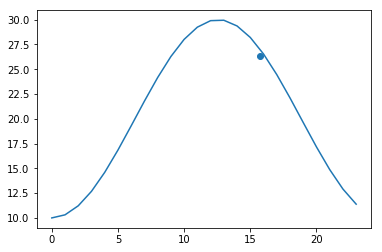

In [10]:
T_s = 20 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)

plt.plot(T_s)
plt.scatter(15.75, 26.327)

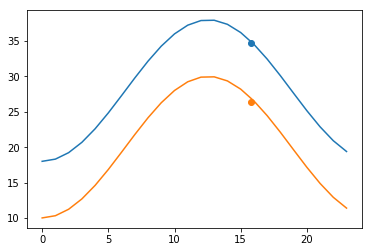

In [68]:
# LST for urban july 2
T_s = 28 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
plt.plot(T_s, label = 'Urban, July 2')
plt.scatter(15.75, 34.6858)

#LST for rural july 2
T_s = 20 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
plt.plot(T_s, label = 'Rural, July 2')
plt.scatter(15.75, 26.327)

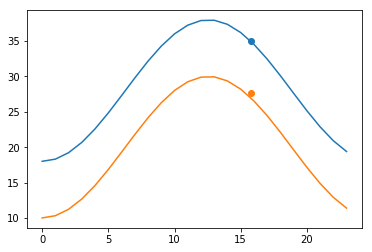

In [69]:
# LST for urban july 18
T_s = 28 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
plt.plot(T_s, label = 'Urban, July 18')
plt.scatter(15.75, 34.9534)

#LST for rural july 18
T_s = 20 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
plt.plot(T_s, label = 'Rural, July 18')
plt.scatter(15.75, 27.5873)

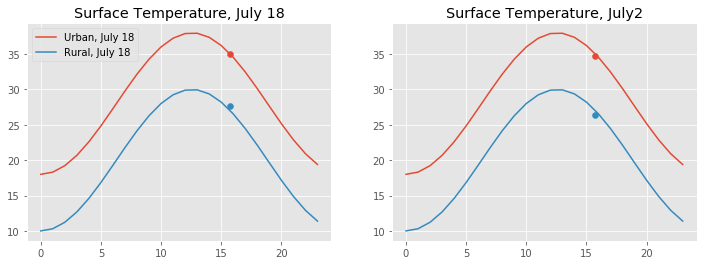

In [23]:
# LST for urban july 18
plt.figure(figsize = [12,4])
ax = plt.subplot(1,2,1)
T_s = 28 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
ax.plot(T_s, label = 'Urban, July 18')
ax.scatter(15.75, 34.9534)

#LST for rural july 18
T_s = 20 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
ax.plot(T_s, label = 'Rural, July 18')
ax.scatter(15.75, 27.5873)
ax.legend()
ax.set_title('Surface Temperature, July 18')

# LST for urban july 2
ax2 = plt.subplot(1,2,2)

T_s = 28 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
ax2.plot(T_s, label = 'Urban, July 2')
ax2.scatter(15.75, 34.6858)

#LST for rural july 2
T_s = 20 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
ax2.plot(T_s, label = 'Rural, July 2')
ax2.scatter(15.75, 26.327)
ax2.set_title('Surface Temperature, July2')

In [64]:
df

,id,longitude,latitude,time,LST_urban,date,cloud_cover,LST_rural,ssc
0,0,-76.6106,39.2811,15:46:18.5995300Z,34.6858,2016-07-02,0.43,26.327,2
0,0,-76.6106,39.2811,15:46:25.2590230Z,34.9534,2016-07-18,5.89,27.5873,6
0,0,-76.6106,39.2811,15:46:28.4215680Z,31.4347,2016-08-03,46.48,24.24,4


In [12]:
def compute_energy_budget(T_a, T_s, rh,  epsilon_a = 0.9025) : 
    q_a = 0.022# needs to be same units as q_star

    alpha = .3

    if T_a.max() < 200: 
        T_a = T_a + 273.15
        T_s = T_s + 273.15
    # make sure there is a diurnal range if using vectors
    R_s = 600
    S_in = R_s -R_s*np.cos(-.25*(np.arange(0,24)))

    rho = 1.29 #kg/m, Seinfeld and Pandis
    cp = 1005 # J/K/kg
    ra = 60 # m/s B&E
    beta = 0.5 # sample value, B&E, moisture availability
    T_bar = 25 # deep ground temperature
    sigma = 5.671e-8 #W.m-2.K-4
    L = 2.5e3
    omega = 1/(12*60*60) # diurnal forcing frequency

    # humidity
    #q_a = 14 # mbar specific humidity
    # from https://woodshole.er.usgs.gov/operations/sea-mat/air_sea-html/qsat.html
    Pa = 1000
#     ew = 6.1121*(1.0007+3.46e-6*Pa)*np.exp((17.502*(T_s))/(240.97+(T_s))) # in mb
#     q_star  = 0.62197*(ew/(Pa-0.378*ew)) # in kg/kg    
#     q_star = q # q_star ~ 0.622 es/Pa saturated  spef. humidity at the surface temperature, t_s

    ew = 6.1121*(1.0007+3.46e-6*Pa)*np.exp((17.502*(T_s))/(240.97+(T_s))) # in mb
    q_star_LST = 0.62197*(ew/(Pa-0.378*ew)) #saturation mixing ratio of water at LST

    # compute q_a
    #rh = rhDF[urban].loc[T_a.index].values.flatten()
    #T_a = T_a.values.flatten()
#     ew = 6.1121*(1.0007+3.46e-6*Pa)*np.exp((17.502*(T_a))/(240.97+(T_a))) # in mb
#     sat_mix_ratio = 0.62197*(ew/(Pa-0.378*ew))
#     mixing_ratio = rh*sat_mix_ratio
#     q_a = mixing_ratio/(1+mixing_ratio)
    
    mixing_ratio = rh2mixr(rh,1013e5, T_a+273.15)
    q_a = mixing_ratio/(1+mixing_ratio)
    
    LE = beta*rho*L/ra * (q_star_LST-q_a)
    # emissivity
    #epsilon_a = 0.7649 # emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 1 http://climatemodels.uchicago.edu/modtran/modtran.html
    epsilon_s = .9

    lw_net = epsilon_a *sigma*T_a**4 - epsilon_s*sigma*T_s**4
    R_net = (1-alpha)*S_in + epsilon_a *sigma*T_a**4 - epsilon_s*sigma*T_s**4
    H = rho*cp/ra * (T_s - T_a)
    #LE = beta*rho*L/ra * (q_star-q_a)
    G = -omega*(T_s -T_bar)
    net = R_net + H+ LE + G
    return R_net, H, LE, G, net, lw_net

In [71]:
ew = 6.1121*(1.0007+3.46e-6*Pa)*np.exp((17.502*(T_a))/(240.97+(T_a))) # in mb
q_star_air = 0.62197*(ew/(Pa-0.378*ew)) #saturation mixing ratio of water at LST
q_star_air

array([ 0.01786144,  0.01765722,  0.01786144,  0.01799838,  0.01786144,
        0.0169931 ,  0.01679875,  0.0169931 ,  0.01786144,  0.01862677,
        0.01891199,  0.01971583,  0.02047332,  0.02165736,  0.02223139,
        0.02248056,  0.0230739 ,  0.02149597,  0.02133564,  0.02055109,
        0.02009201,  0.01927338,  0.01883975,  0.01806665])

In [14]:
from math import log10,exp

# Description:
# conversions between different humidity quantities

Mw=18.0160 # molecular weight of water
Md=28.9660 # molecular weight of dry air
R =  8.31432E3 # gas constant
Rd = R/Md # specific gas constant for dry air
Rv = R/Mw # specific gas constant for vapour
Lv = 2.5e6 # heat release for condensation of water vapour [J kg-1]
eps = Mw/Md
#saturation pressure
def esat(T):
    ''' get sateration pressure (units [Pa]) for a given air temperature (units [K])'''
    from numpy import log10
    TK = 273.15
    e1 = 101325.0
    logTTK = log10(T/TK)
    esat =  e1*10**(10.79586*(1-TK/T)-5.02808*logTTK+ 1.50474*1e-4*(1.-10**(-8.29692*(T/TK-1)))+ 0.42873*1e-3*(10**(4.76955*(1-TK/T))-1)-2.2195983) 
    return esat
def esat2(T):
    ''' a simpler form for the saturation pressure (units [Pa]) for a given air temperature (units [K]), based on clausius-claperyon'''
    return 611.*exp(-Lv/Rv*(1./T - 1./273.16))

def rh2mixr(RH,p,T):
    '''purpose: conversion relative humidity (unitless) to mixing ratio [kg/kg]'''
    es = esat(T)
    return Mw/Md*RH*es/(p-RH*es)

def mixr2rh(mixr,p,T):
    '''purpose: conversion mixing ratio to relative humidity [kg/kg] (not tested)'''
    return mixr * p/((mixr+Mw/Md)*esat(T))

def mixr2sh(W):
    '''conversion from mixing ratio (units [kg/kg]) to specific humidity (units also [kg/kg])
    '''
    return W/(1.+W)
def sh2mixr(qv):
    '''conversion from specific humidity (units [kg/kg]) to mixing ratio (units also [kg/kg])
    '''
    return qv/(1.-qv)
def ea2mixr(P,ea):
    '''conversion from dry air and vapour pressure (units [Pa]) to mixing ratio (units [kg/kg]) 
    '''
    return 0.622*ea/(P-ea)
def mixr2ea(P,mixr):
    '''conversion from dry air pressure (units [Pa]) and mixing ratio (units [kg/kg] to vapour pressure (units [Pa])
    '''
    return P*mixr/(0.622+ea)

def ah2mixr (rhov,p,T):
    '''conversion from absolute humidity (units [kg/m**3]) to mixing ratio (units also [kg/kg])
       not tested
    '''
    return (Rd * T)/(p/rhov-Rv*T)

# not tested
def wvap2sh(e,p):
    '''conversion from water vapour pressure (units [Pa]) to specific humidity (units [kg/kg]) 
    '''
    return eps*e/(p-(1.-eps)*e)

def rh2ah(RH,p,T):
    '''conversion relative humidity to absolute humidity (kg Water per m^3 Air)'''
    mixr=rh2mixr(RH, p,T)
    sh=mixr2sh(mixr)
    return  sh*rhov(T,p,sh) 

In [113]:
T_a= tempDF[[urban]]['2016-07-02']
rh = rhDF[urban].loc[T_a.index]

mixr = rh2mixr(rh.values.flatten(),1013e5, T_a.values.flatten()+273.15)
mixr

array([ 0.0015195 ,  0.0015112 ,  0.00133364,  0.00112634,  0.00106712,
        0.00107354,  0.00104239,  0.00100598,  0.00096388,  0.00086103,
        0.00081678,  0.00082706,  0.00082078,  0.00073295,  0.0007661 ,
        0.00077458,  0.00076575,  0.00080817,  0.00081544,  0.00083652,
        0.00080567,  0.00083223,  0.0008022 ,  0.00086794])

In [ ]:
T = 
TK = 273.15
e1 = 101325.0
logTTK = log10(T/TK)
esat =  e1*10**(10.79586*(1-TK/T)-5.02808*logTTK+ 1.50474*1e-4*(1.-10**(-8.29692*(T/TK-1)))+ 0.42873*1e-3*(10**(4.76955*(1-TK/T))-1)-2.2195983) 

mixing_ratio = Mw/Md*RH*es/(p-RH*es)

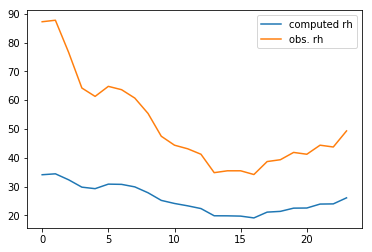

In [79]:
plt.plot(q_a/q_star_air, label = 'computed rh')
plt.plot(rh, label = 'obs. rh')
plt.legend()

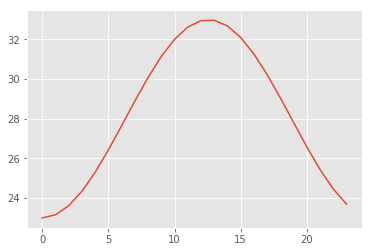

In [7]:
T_s = 28 + 5*np.sin(-.25*(np.arange(0,24))-np.pi/2)
plt.plot(T_s)

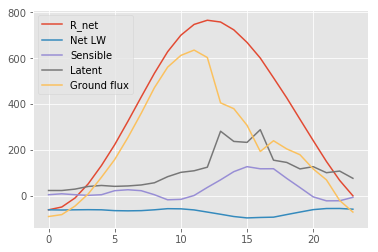

In [15]:
T_a= tempDF[[urban]]['2016-07-02']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
# T_s = 28 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
T_s = 28 + 5*np.sin(-.5*(np.arange(0,24))-np.pi-.1)
T_s[0:9] = T_s[10]
T_s[23] = T_s[22]

epsilon_a = 1-0.2351 # emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 1 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, 
                                                     rhDF[urban].loc[T_a.index].values.flatten(), 
                                                     epsilon_a)
handle = plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux', 'Net'])

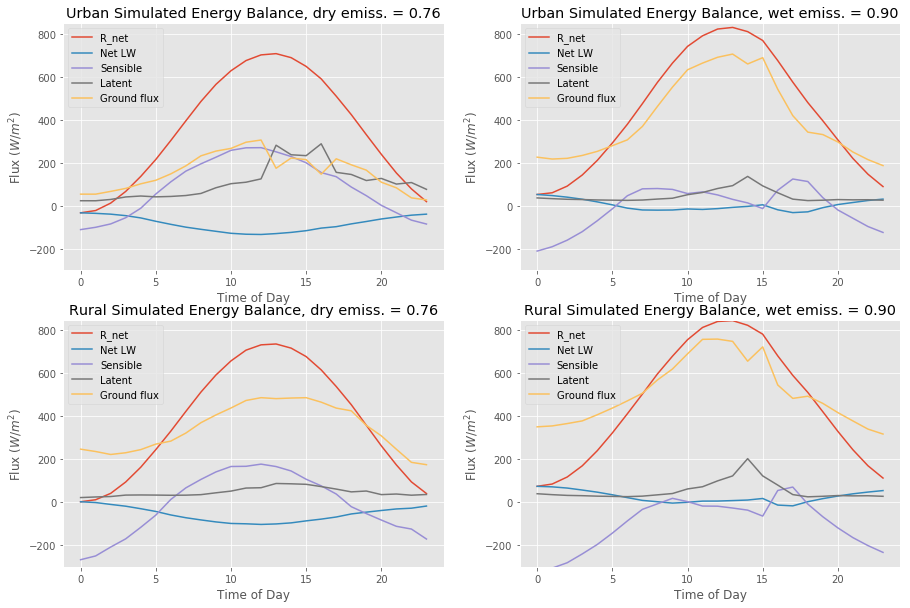

In [17]:
# Compute dry energy budget 
## Urban
T_a= tempDF[[urban]]['2016-07-02']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
T_s = 28 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
rh = rhDF[urban]['2016-07-02']

fig = plt.figure(figsize = [15,10])
plt.subplot(2,2,1)

epsilon_a = 1-0.2351 # emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 1 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, rh.values.flatten(), epsilon_a)
plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.ylim([-300, 850])
plt.xlabel('Time of Day')
plt.ylabel('Flux ($W/m^2$)')
plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux', 'Net'])
plt.title('Urban Simulated Energy Balance, dry emiss. = %2.2f'%epsilon_a)

# Compute the moist energy budget
T_a= tempDF[[urban]]['2016-07-18']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
rh = rhDF[urban]['2016-07-18']

plt.subplot(2,2,2)
epsilon_a = 1-0.0975 # 'wet' emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 2 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, rh.values.flatten(), epsilon_a)
plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.ylim([-300, 850])

plt.xlabel('Time of Day')
plt.ylabel('Flux ($W/m^2$)')
plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux'])
plt.title('Urban Simulated Energy Balance, wet emiss. = %2.2f'%epsilon_a)

## Rural 
T_a= tempDF[[rural]]['2016-07-02']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
T_s = 20 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
rh = rhDF[rural]['2016-07-02']

# Compute dry energy budget 
plt.subplot(2,2,3)
epsilon_a = 1-0.2351 # emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 1 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, rh.values.flatten(), epsilon_a)
plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.ylim([-300, 850])

plt.xlabel('Time of Day')
plt.ylabel('Flux ($W/m^2$)')
plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux', ])
plt.title('Rural Simulated Energy Balance, dry emiss. = %2.2f'%epsilon_a)

# Compute the moist energy budget
T_a= tempDF[[rural]]['2016-07-18']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
rh = rhDF[urban]['2016-07-18']

plt.subplot(2,2,4)
epsilon_a = 1-0.0975 # 'wet' emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 2 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, rh.values.flatten(), epsilon_a)
plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.ylim([-300, 850])

plt.xlabel('Time of Day')
plt.ylabel('Flux ($W/m^2$)')

plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux'])
plt.title('Rural Simulated Energy Balance, wet emiss. = %2.2f'%epsilon_a)

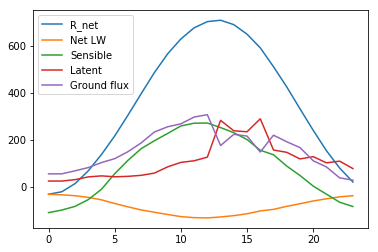

In [116]:
T_a= tempDF[[urban]]['2016-07-02']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
# T_s = 28 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
T_s = 28 + 5*np.sin(-.5*(np.arange(0,24))-np.pi-.1)
T_s[0:9] = T_s[10]
T_s[23] = T_s[22]

epsilon_a = 1-0.2351 # emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 1 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, 
                                                     rhDF[urban].loc[T_a.index].values.flatten(), 
                                                     epsilon_a)
handle = plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux', 'Net'])


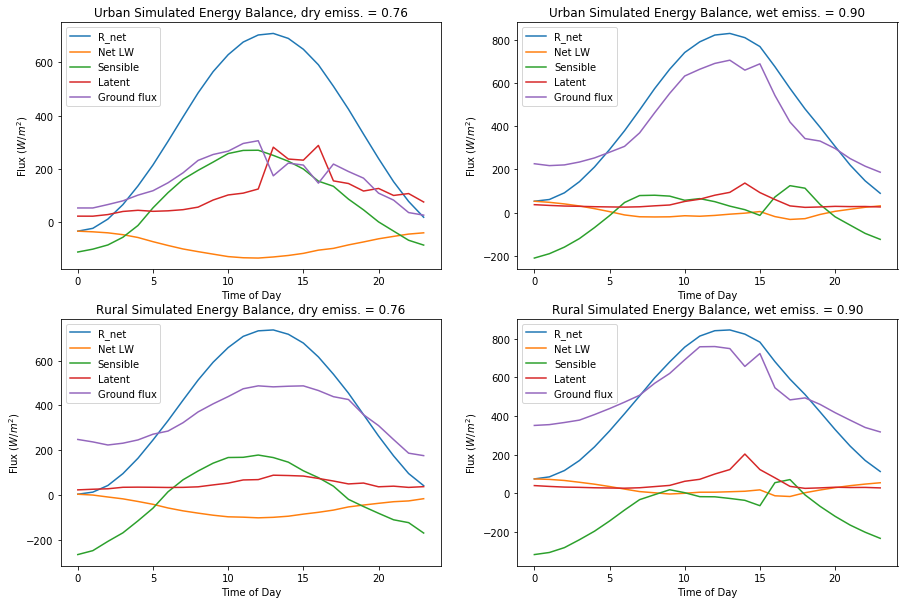

In [117]:
# Compute dry energy budget 
## Urban
T_a= tempDF[[urban]]['2016-07-02']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
T_s = 28 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
rh = rhDF[urban]['2016-07-02']

fig = plt.figure(figsize = [15,10])
plt.subplot(2,2,1)

epsilon_a = 1-0.2351 # emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 1 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, rh.values.flatten(), epsilon_a)
plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.xlabel('Time of Day')
plt.ylabel('Flux ($W/m^2$)')
plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux', 'Net'])
plt.title('Urban Simulated Energy Balance, dry emiss. = %2.2f'%epsilon_a)

# Compute the moist energy budget
T_a= tempDF[[urban]]['2016-07-18']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
rh = rhDF[urban]['2016-07-18']

plt.subplot(2,2,2)
epsilon_a = 1-0.0975 # 'wet' emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 2 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, rh.values.flatten(), epsilon_a)
plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.xlabel('Time of Day')
plt.ylabel('Flux ($W/m^2$)')
plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux'])
plt.title('Urban Simulated Energy Balance, wet emiss. = %2.2f'%epsilon_a)

## Rural 
T_a= tempDF[[rural]]['2016-07-02']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
T_s = 20 + 10*np.sin(-.25*(np.arange(0,24))-np.pi/2)
rh = rhDF[rural]['2016-07-02']

# Compute dry energy budget 
plt.subplot(2,2,3)
epsilon_a = 1-0.2351 # emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 1 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, rh.values.flatten(), epsilon_a)
plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.xlabel('Time of Day')
plt.ylabel('Flux ($W/m^2$)')
plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux', ])
plt.title('Rural Simulated Energy Balance, dry emiss. = %2.2f'%epsilon_a)

# Compute the moist energy budget
T_a= tempDF[[rural]]['2016-07-18']#20 + 8*np.sin(-.25*(np.arange(0,24)+ 3.14))
rh = rhDF[urban]['2016-07-18']

plt.subplot(2,2,4)
epsilon_a = 1-0.0975 # 'wet' emiss = absorpt. = 1- transmissivity; estimated from ModTran, using water vapor scale of 2 http://climatemodels.uchicago.edu/modtran/modtran.html
R_net, H, LE, G, net, lw_net = compute_energy_budget(np.array(T_a.T.values)[0], T_s, rh.values.flatten(), epsilon_a)
plt.plot(np.arange(0,24), R_net, 
        np.arange(0,24), lw_net,
        np.arange(0,24), H, 
        np.arange(0,24), LE, 
        np.arange(0,24), R_net - H -LE, 
        #np.arange(0,24), net, '--k',
        )
plt.xlabel('Time of Day')
plt.ylabel('Flux ($W/m^2$)')

plt.legend(['R_net', 'Net LW','Sensible', 'Latent', 'Ground flux'])
plt.title('Rural Simulated Energy Balance, wet emiss. = %2.2f'%epsilon_a)

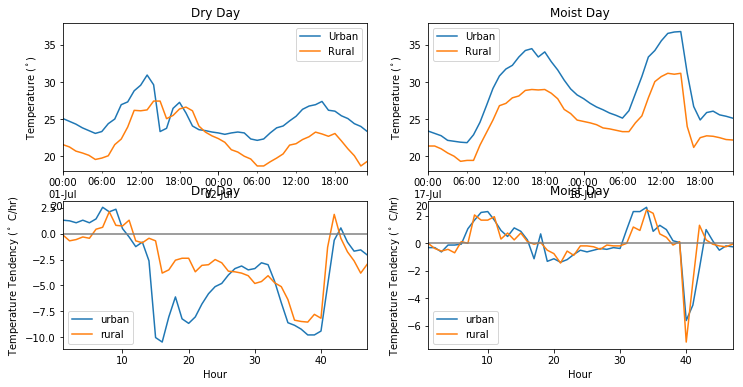

In [118]:
plt.figure(figsize=[12,6])
# plot temperature 
ax = plt.subplot(221)
tempDF[[urban, rural]]['2016-07-01':'2016-07-02'].plot(ax = ax)
plt.legend(['Urban', 'Rural'])
plt.title('Dry Day')
plt.ylim([18,38])
plt.ylabel('Temperature ($^\circ$)')

ax2 = plt.subplot(222)
tempDF[[urban, rural]]['2016-07-17':'2016-07-18'].plot(ax = ax2)
plt.legend(['Urban', 'Rural'])
plt.title('Moist Day')
plt.ylim([18,38])
plt.ylabel('Temperature ($^\circ$)')

# plot temp tendency
ax3 = plt.subplot(223)
dT = pd.DataFrame(tempDF[[urban, rural]]['2016-07-01':'2016-07-02'].iloc[1:,:].values - tempDF[[urban, rural]]['2016-07-17':'2016-07-18'].iloc[0:-1,:].values, 
            columns = ['urban', 'rural'], index = np.arange(1,48))
dT.plot(ax = ax3)
plt.axhline(0, color = 'grey')
plt.xlabel('Hour')
plt.ylabel('Temperature Tendency ($^\circ$ C/hr)')
plt.title('Dry Day')

ax4 = plt.subplot(224)
dT = pd.DataFrame(tempDF[[urban, rural]]['2016-07-17':'2016-07-18'].iloc[1:,:].values - tempDF[[urban, rural]]['2016-07-17':'2016-07-18'].iloc[0:-1,:].values, 
            columns = ['urban', 'rural'], index = np.arange(1,48))
dT.plot(ax = ax4)
plt.axhline(0, color = 'grey')

plt.xlabel('Hour')
plt.ylabel('Temperature Tendency ($^\circ$ C/hr)')
plt.title('Moist Day')

In [119]:
rho = 1
epsilon_s = .9
dT_model = epsilon_s*sigma*T_s**4 - 2*epsilon_a*sigma*T_a.values.flatten()**4
dT_model

array([-0.03740482, -0.03619573, -0.03448337, -0.03149485, -0.02981427,
       -0.02701149, -0.0230723 , -0.01865282, -0.01937877, -0.01838936,
       -0.03021893, -0.04606498, -0.0504897 , -0.05556764, -0.05709772,
       -0.06428357, -0.00855048, -0.00227993, -0.01395769, -0.0197638 ,
       -0.02260218, -0.02364872, -0.02358266, -0.02386572])

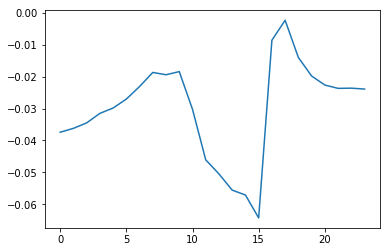

In [120]:
plt.plot(dT_model)

(-0.3085669032561858, -0.40857399451669435, 1.2485493425680704e-05)

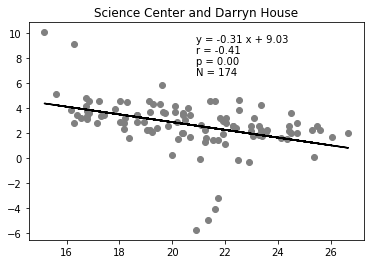

In [121]:
#plt.figure(figsize = [10,5])
#plt.subplot(1,2,1)
UHI = (tempDF[urban][tempDF.index.hour ==6 ] - tempDF[rural][tempDF.index.hour ==6 ])
#UHI = (tempDF[urban].resample('D').min() - tempDF[rural].resample('D').min())
easy_scatter(tempDF[rural][tempDF.index.hour ==6 ],
             UHI, 'Science Center and Darryn House')

# plt.subplot(1,2,2)
# UHI = (tempDF[97].resample('D').min() - tempDF[rural].resample('D').min())
# easy_scatter(tempDF[rural].resample('D').min(), UHI, 'Science Center and Darryn House')

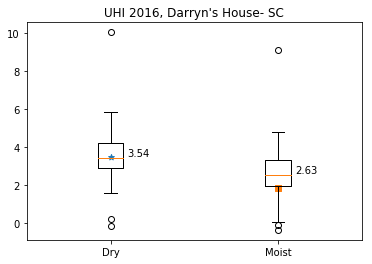

In [122]:
# read in synoptic Data
# file = '/Users/ascott47/blausteinmount/heat/data/synopticclassification/' + 'BWI'+ '.dbdmt'
# synopticDF =  pd.read_table(file, sep = ' ', header =  None, parse_dates = [1])
# synopticDF.columns = ['id','date', 'ssc']
# synopticDF = synopticDF.set_index(synopticDF['date'])
# synopticDF['ssc'].loc[synopticDF['ssc']> 60] =6.5

# syn = synopticDF['ssc']['2016-06-01': '2016-09-15'].resample('D').mean()#[pd.PeriodIndex(UHI.index, freq = 'D')[0]:pd.PeriodIndex(UHI.index, freq = 'D')[-1]]

UHI = (tempDF[urban][tempDF.index.hour ==6 ] - tempDF[rural][tempDF.index.hour ==6 ]).resample('D').mean()
dry_UHI = UHI[syn[syn <=3].index].dropna()
moist_UHI = UHI[syn[syn > 3].index].dropna()
data = [dry_UHI.values, 
        moist_UHI.values]
fig,ax = plt.subplots()
plot_handle = plt.boxplot(data)
ax.set_xticklabels(['Dry', 'Moist'])
plt.text(1.1, dry_UHI.mean(), '%2.2f'%dry_UHI.mean())
plt.text(2.1, moist_UHI.mean(), '%2.2f'%moist_UHI.mean())
ax.set_title('UHI 2016, Darryn\'s House- SC')

plt.scatter(1, UHI['2016-07-02'], marker='*')
plt.scatter(2, UHI['2016-07-18'], marker='s')

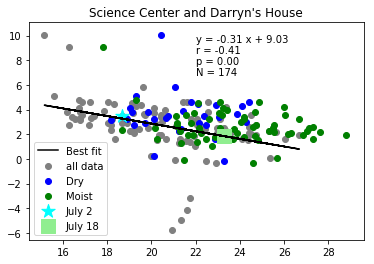

In [264]:
UHI = (tempDF[urban][tempDF.index.hour ==6 ] - tempDF[rural][tempDF.index.hour ==6 ])
easy_scatter(tempDF[rural][tempDF.index.hour ==6 ],
             UHI, 'Science Center and Darryn\'s House')
plt.scatter(tempDF.loc[dry_UHI.index][rural], 
           UHI.resample('D').mean().loc[dry_UHI.index], color = 'blue')
plt.scatter(tempDF.loc[moist_UHI.index][rural], 
           UHI.resample('D').mean().loc[moist_UHI.index], color = 'green')

plt.scatter(tempDF[rural]['2016-07-02 06:00:00'], UHI['2016-07-02'], s=200, marker = '*', color = 'cyan')
plt.scatter(tempDF[rural]['2016-07-18 06:00:00'], UHI['2016-07-18'], s=200, marker = 's', color = 'lightgreen')
#plt.scatter(tempDF[rural]['2016-08-03 06:00:00'], UHI['2016-08-03'], s=200, marker = 's', color = 'pink')

plt.legend(['Best fit', 'all data', 'Dry', 'Moist', 'July 2', 'July 18', 'Aug 3'], loc = 3)

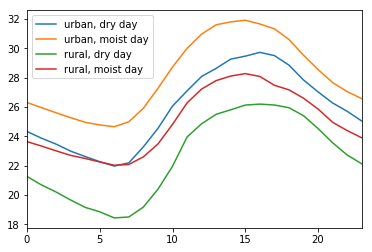

In [195]:
# frames = []
# for date in syn[syn<=3].index: 
#     frames.append(tempDF[tempDF.index.date==date.to_datetime().date()])
    
# dry_tempDF = pd.concat(frames)

# frames = []
# for date in syn[syn>3].index: 
#     frames.append(tempDF[tempDF.index.date==date.to_datetime().date()])
    
# moist_tempDF = pd.concat(frames)
dry_tempDF.groupby(dry_tempDF.index.hour).mean()[urban].plot(label= 'urban, dry day')
moist_tempDF.groupby(moist_tempDF.index.hour).mean()[urban].plot(label= 'urban, moist day')
dry_tempDF.groupby(dry_tempDF.index.hour).mean()[rural].plot(label= 'rural, dry day')
moist_tempDF.groupby(moist_tempDF.index.hour).mean()[rural].plot(label= 'rural, moist day')
plt.legend()

# to do: 
- ground check LST daily cycle 
- incoporate actual radiation data
- check signs of terms

In [314]:
plt.boxplot?